In [34]:
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import PIL

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### import pretrained model

In [35]:
from inception_resnet_v1 import *
model = InceptionResNetV1(weights_path='weights/facenet_keras_weights.h5')

In [36]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_23[0][0]']               
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                

 on)                                                                                              
                                                                                                  
 Block35_1_Branch_1_Conv2d_0a_1  (None, 17, 17, 32)  0           ['Block35_1_Branch_1_Conv2d_0a_1x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block35_1_Branch_2_Conv2d_0b_3  (None, 17, 17, 32)  0           ['Block35_1_Branch_2_Conv2d_0b_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_1_Branch_0_Conv2d_1x1   (None, 17, 17, 32)  8192        ['Conv2d_4b_3x3_Activation[0][0]'
 (Conv2D)                                                        ]                                
          

                                                                                                  
 Block35_2_Branch_0_Conv2d_1x1   (None, 17, 17, 32)  8192        ['Block35_1_Activation[0][0]']   
 (Conv2D)                                                                                         
                                                                                                  
 Block35_2_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  9216        ['Block35_2_Branch_1_Conv2d_0a_1x
 x3 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block35_2_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  9216        ['Block35_2_Branch_2_Conv2d_0b_3x
 x3 (Conv2D)                                                     3_Activation[0][0]']             
                                                                                                  
 Block35_2

 Block35_3_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  9216        ['Block35_3_Branch_2_Conv2d_0b_3x
 x3 (Conv2D)                                                     3_Activation[0][0]']             
                                                                                                  
 Block35_3_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  96          ['Block35_3_Branch_0_Conv2d_1x1[0
 BatchNorm (BatchNormalization)                                  ][0]']                           
                                                                                                  
 Block35_3_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  96          ['Block35_3_Branch_1_Conv2d_0b_3x
 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_3

 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_4_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  96          ['Block35_4_Branch_2_Conv2d_0c_3x
 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_4_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  0           ['Block35_4_Branch_0_Conv2d_1x1_B
 Activation (Activation)                                         atchNorm[0][0]']                 
                                                                                                  
 Block35_4

 Block35_5_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  0           ['Block35_5_Branch_0_Conv2d_1x1_B
 Activation (Activation)                                         atchNorm[0][0]']                 
                                                                                                  
 Block35_5_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  0           ['Block35_5_Branch_1_Conv2d_0b_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_5_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  0           ['Block35_5_Branch_2_Conv2d_0c_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_5_Concatenate (Concate  (None, 17, 17, 96)  0           ['Block35_5_Branch_0_Conv2d_1x1_A
 nate)    

 Block17_1_Branch_1_Conv2d_0a_1  (None, 8, 8, 128)   0           ['Block17_1_Branch_1_Conv2d_0a_1x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block17_1_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   114688      ['Block17_1_Branch_1_Conv2d_0a_1x
 x7 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block17_1_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   384         ['Block17_1_Branch_1_Conv2d_0b_1x
 x7_BatchNorm (BatchNormalizati                                  7[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block17_1

 Block17_2_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   0           ['Block17_2_Branch_1_Conv2d_0c_7x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block17_2_Concatenate (Concate  (None, 8, 8, 256)   0           ['Block17_2_Branch_0_Conv2d_1x1_A
 nate)                                                           ctivation[0][0]',                
                                                                  'Block17_2_Branch_1_Conv2d_0c_7x
                                                                 1_Activation[0][0]']             
                                                                                                  
 Block17_2_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      ['Block17_2_Concatenate[0][0]']  
                                                                                                  
 lambda_90

 x7 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block17_4_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   384         ['Block17_4_Branch_1_Conv2d_0b_1x
 x7_BatchNorm (BatchNormalizati                                  7[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block17_4_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   0           ['Block17_4_Branch_1_Conv2d_0b_1x
 x7_Activation (Activation)                                      7_BatchNorm[0][0]']              
                                                                                                  
 Block17_4_Branch_0_Conv2d_1x1   (None, 8, 8, 128)   114688      ['Block17_3_Activation[0][0]']   
 (Conv2D) 

 nate)                                                           ctivation[0][0]',                
                                                                  'Block17_5_Branch_1_Conv2d_0c_7x
                                                                 1_Activation[0][0]']             
                                                                                                  
 Block17_5_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      ['Block17_5_Concatenate[0][0]']  
                                                                                                  
 lambda_93 (Lambda)             (None, 8, 8, 896)    0           ['Block17_5_Conv2d_1x1[0][0]']   
                                                                                                  
 add_93 (Add)                   (None, 8, 8, 896)    0           ['Block17_4_Activation[0][0]',   
                                                                  'lambda_93[0][0]']              
          

 on)                                                                                              
                                                                                                  
 Block17_7_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   0           ['Block17_7_Branch_1_Conv2d_0b_1x
 x7_Activation (Activation)                                      7_BatchNorm[0][0]']              
                                                                                                  
 Block17_7_Branch_0_Conv2d_1x1   (None, 8, 8, 128)   114688      ['Block17_6_Activation[0][0]']   
 (Conv2D)                                                                                         
                                                                                                  
 Block17_7_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   114688      ['Block17_7_Branch_1_Conv2d_0b_1x
 x1 (Conv2D)                                                     7_Activation[0][0]']             
          

 Block17_8_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      ['Block17_8_Concatenate[0][0]']  
                                                                                                  
 lambda_96 (Lambda)             (None, 8, 8, 896)    0           ['Block17_8_Conv2d_1x1[0][0]']   
                                                                                                  
 add_96 (Add)                   (None, 8, 8, 896)    0           ['Block17_7_Activation[0][0]',   
                                                                  'lambda_96[0][0]']              
                                                                                                  
 Block17_8_Activation (Activati  (None, 8, 8, 896)   0           ['add_96[0][0]']                 
 on)                                                                                              
                                                                                                  
 Block17_9

                                                                                                  
 Block17_10_Branch_0_Conv2d_1x1  (None, 8, 8, 128)   114688      ['Block17_9_Activation[0][0]']   
  (Conv2D)                                                                                        
                                                                                                  
 Block17_10_Branch_1_Conv2d_0c_  (None, 8, 8, 128)   114688      ['Block17_10_Branch_1_Conv2d_0b_1
 7x1 (Conv2D)                                                    x7_Activation[0][0]']            
                                                                                                  
 Block17_10_Branch_0_Conv2d_1x1  (None, 8, 8, 128)   384         ['Block17_10_Branch_0_Conv2d_1x1[
 _BatchNorm (BatchNormalization                                  0][0]']                          
 )                                                                                                
          

 3 (Conv2D)                                                      _Activation[0][0]']              
                                                                                                  
 Mixed_7a_Branch_0_Conv2d_1a_3x  (None, 3, 3, 384)   1152        ['Mixed_7a_Branch_0_Conv2d_1a_3x3
 3_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Mixed_7a_Branch_1_Conv2d_1a_3x  (None, 3, 3, 256)   768         ['Mixed_7a_Branch_1_Conv2d_1a_3x3
 3_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Mixed_7a_

 add_99 (Add)                   (None, 3, 3, 1792)   0           ['Mixed_7a[0][0]',               
                                                                  'lambda_99[0][0]']              
                                                                                                  
 Block8_1_Activation (Activatio  (None, 3, 3, 1792)  0           ['add_99[0][0]']                 
 n)                                                                                               
                                                                                                  
 Block8_2_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   344064      ['Block8_1_Activation[0][0]']    
 1 (Conv2D)                                                                                       
                                                                                                  
 Block8_2_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   576         ['Block8_2_Branch_1_Conv2d_0a_1x1
 1_BatchNo

 Block8_3_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   110592      ['Block8_3_Branch_1_Conv2d_0b_1x3
 1 (Conv2D)                                                      _Activation[0][0]']              
                                                                                                  
 Block8_3_Branch_0_Conv2d_1x1_B  (None, 3, 3, 192)   576         ['Block8_3_Branch_0_Conv2d_1x1[0]
 atchNorm (BatchNormalization)                                   [0]']                            
                                                                                                  
 Block8_3_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   576         ['Block8_3_Branch_1_Conv2d_0c_3x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Block8_3_

 n)                                                                                               
                                                                                                  
 Block8_5_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   344064      ['Block8_4_Activation[0][0]']    
 1 (Conv2D)                                                                                       
                                                                                                  
 Block8_5_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   576         ['Block8_5_Branch_1_Conv2d_0a_1x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Block8_5_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   0           ['Block8_5_Branch_1_Conv2d_0a_1x1
 1_Activat

 atchNorm (BatchNormalization)                                   [0]']                            
                                                                                                  
 Block8_6_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   576         ['Block8_6_Branch_1_Conv2d_0c_3x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Block8_6_Branch_0_Conv2d_1x1_A  (None, 3, 3, 192)   0           ['Block8_6_Branch_0_Conv2d_1x1_Ba
 ctivation (Activation)                                          tchNorm[0][0]']                  
                                                                                                  
 Block8_6_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   0           ['Block8_6_Branch_1_Conv2d_0c_3x1
 1_Activat

In [37]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

In [38]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = PIL.Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = PIL.Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

## Create Dataset

In [39]:
root_path = "C:\\Users\Lenovo\Documents\Github\Datasets\Facial-Emotion-Recognition\Data"
folder_names = ['0', '1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
file_names = ['Anger.jpg', 'Contempt.jpg', 'Disgust.jpg', 'Fear.jpg', 'Happy.jpg', 'Neutral.jpg', 'Sad.jpg', 'Surprised.jpg']

In [40]:
#dataset splited by individuals
list_of_all_individuals_arrays = []
for folder in folder_names:
    list_of_individual_arrays = []

    for file in file_names:
        print(f'file name : {folder}/{file}')
        path = os.path.join(root_path, folder, file)
        image_array = extract_face(path)
        list_of_individual_arrays.append(image_array)

    print()
    print('folder name : ', folder, '-->', np.array(list_of_individual_arrays).shape)
    print('-'*60)
    list_of_all_individuals_arrays.append(list_of_individual_arrays)

data_split_by_individuals = np.array(list_of_all_individuals_arrays)
print('all individuals array shape : ', data_split_by_individuals.shape)

dataset is found in "dataset/data_split_by_individuals.npy"


In [41]:
#dataset splited by emotions
# Transpose only the first two dimensions
data_split_by_emotions = data_split_by_individuals.transpose(1, 0, 2, 3, 4)  # Swap dim0 and dim1

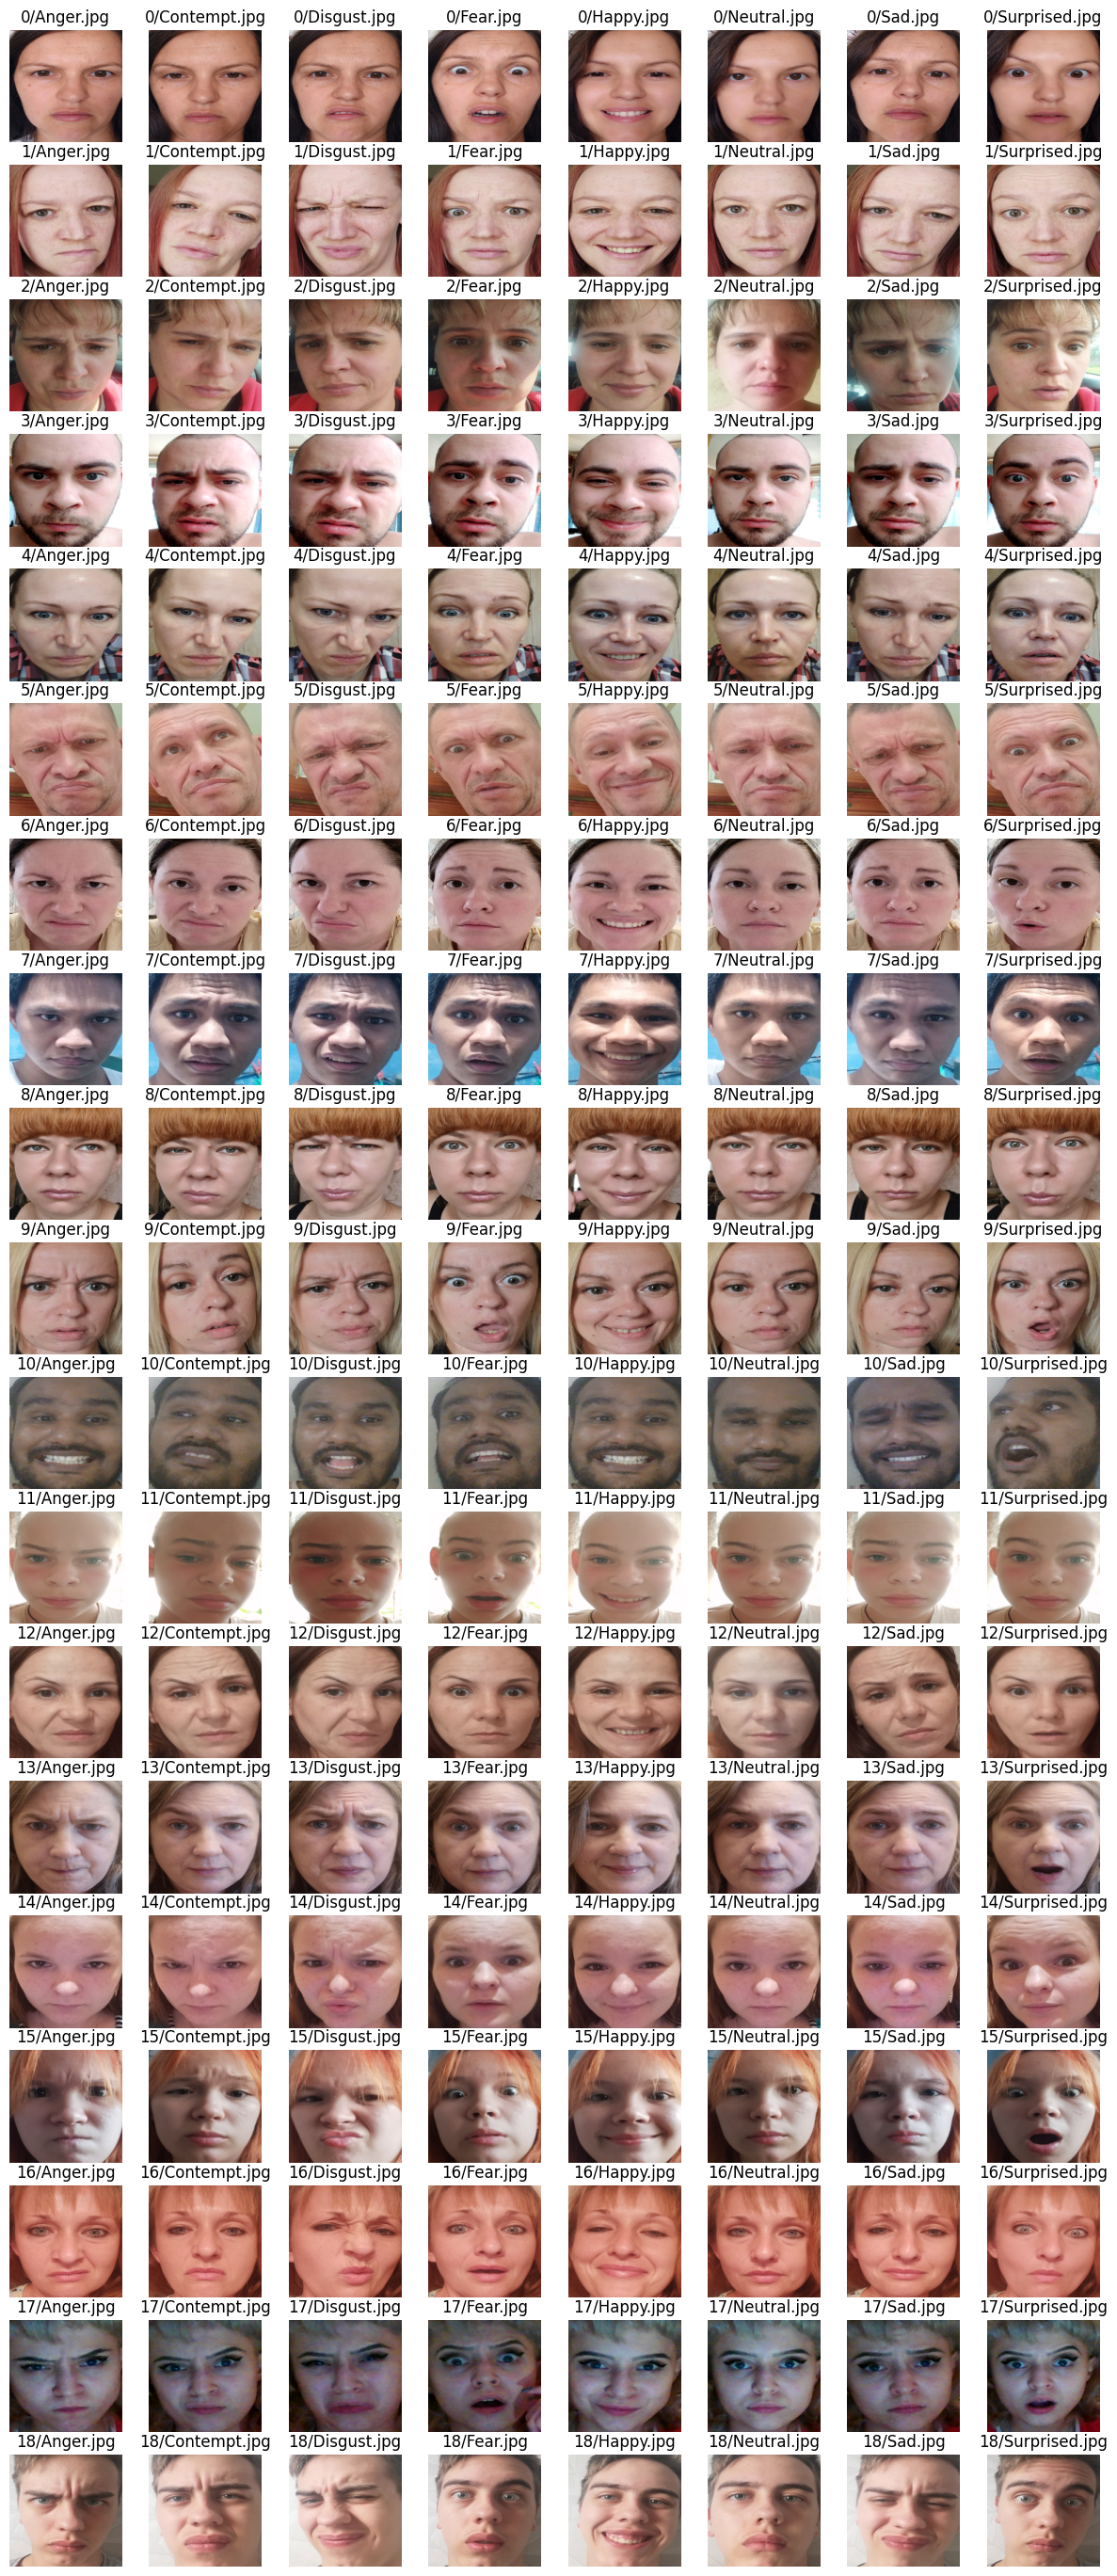

In [42]:
fig = plt.figure(figsize=(15, 35))
columns = 8
rows = 19
cnt = 0
for row in range(rows):
    for col in range(columns):
        cnt += 1
        img = data_split_by_individuals[row, col, :, :, :]
        fig.add_subplot(rows, columns, cnt)
        plt.axis('off')
        plt.title(f'{folder_names[row]}/{file_names[col]}')
        plt.imshow(img)
plt.show()

### Train a SVM model after creating embedings
to detect ID of the individuals by each face image

In [43]:
#create embedings as database
# to normalize
mean, std = data_split_by_individuals.mean(axis=(2, 3, 4)), data_split_by_individuals.std(axis=(2, 3, 4))
mean = mean.reshape((mean.shape+(1, 1, 1)))
std = std.reshape((std.shape+(1, 1, 1)))
data_split_by_individuals_norm = (data_split_by_individuals - mean) / std

dataset_norm = data_split_by_individuals_norm.reshape((152, 160, 160, 3))

embedings = model.predict(dataset_norm)

embedings_split_by_individuals = embedings.reshape(19, 8, 128)
embedings_split_by_emotions = embedings_split_by_individuals.transpose(1, 0, 2)

labels = []
for individual in range(19):
    for _ in range(8):
        labels.append(individual)
labels = np.array(labels)
print(f'embedings shape : {embedings.shape}')
print(f'labels shape : {labels.shape}')
print('labels :')
print(labels)

5/5 [==============================] - 4s 70ms/step
embedings shape : (152, 128)
labels shape : (152,)
labels :
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18]


In [44]:
#shuffle dataset
import random
index_list = [i for i in range(152)]
random.shuffle(index_list)
embedings_shuffled  = embedings[index_list, :]
labels_shuffled = labels[index_list,]

In [45]:
#train test split
X_train_emb = embedings_shuffled[:120]
X_val_emb = embedings_shuffled[120:]
Y_train = labels_shuffled[:120]
Y_val = labels_shuffled[120:]

print(f'X_train_emb shape : {X_train_emb.shape}')
print(f'X_val_emb shape : {X_val_emb.shape}')
print(f'Y_train shape : {Y_train.shape}')
print(f'Y_val shape : {Y_val.shape}')

X_train_emb shape : (120, 128)
X_val_emb shape : (32, 128)
Y_train shape : (120,)
Y_val shape : (32,)


In [46]:
from sklearn.preprocessing import Normalizer
# normalize input embeding vectors
transformer = Normalizer(norm='l2')
X_train_emb_norm = transformer.transform(X_train_emb)
X_val_emb_norm = transformer.transform(X_val_emb)

In [47]:
from sklearn.svm import SVC
# fit model
SVM_model = SVC(kernel='linear', probability=True)
SVM_model.fit(X_train_emb_norm, Y_train)

SVC(kernel='linear', probability=True)

In [48]:
from sklearn.metrics import accuracy_score
# predict
yhat_train = SVM_model.predict(X_train_emb_norm)
yhat_val = SVM_model.predict(X_val_emb_norm)
# score
score_train = accuracy_score(Y_train, yhat_train)
score_val = accuracy_score(Y_val, yhat_val)
# summarize
print('Accuracy: train=%.3f, validation=%.3f' % (score_train*100, score_val*100))

Accuracy: train=100.000, validation=100.000


### Train a SVM model on Cosine similarity of embedings dataset
to detect two face images are same person or not

In [49]:
print(embedings_split_by_individuals.shape)
print(labels.shape)

(19, 8, 128)
(152,)


In [50]:
#cosine similarity for use in visualization
def cosine_similarity(A, B):
    dot_product = np.dot(A, B)
    magnitude_A = np.linalg.norm(A)
    magnitude_B = np.linalg.norm(B)
    cosine_similarity = dot_product / (magnitude_A * magnitude_B)
    return cosine_similarity

In [51]:
#create a list of cosine value and simple embedings of same individuals
cosine_similarities = []
simple_similarities = []

#person in embedings_split_by_individuals with shape (19, 8, 128)
for index, person in enumerate(embedings_split_by_individuals):

    #X_temp in embedings with shape (8, 128) for each individual
    X_temp = embedings_split_by_individuals[index]
    
    #emb shape is (128,) itterate in X_temp(X_temp is X_train[individual])
    for cnt, emb in enumerate(X_temp):
        
        for i in range(len(X_temp)-cnt-1):
            cosine_similarities.append(cosine_similarity(emb, X_temp[cnt+i+1]))
            simple_similarities.append(emb - X_temp[cnt+i+1])
                
print(f'length cosine_similarities : {len(cosine_similarities)} --> shape{np.array(cosine_similarities).shape}')
print(f'length simple_similarities : {len(simple_similarities)} --> shape{np.array(simple_similarities).shape}')


length cosine_similarities : 532 --> shape(532,)
length simple_similarities : 532 --> shape(532, 128)


In [52]:
#create a list of cosine value and simple embedings of different individuals
cosine_differences = []
simple_differences= []
for cnt, person in enumerate(embedings_split_by_individuals):
    #person_1 itterate on people names
    person_1 = person
    index_1 = cnt
    #X_temp in embedings with shape (14, 128), (17, 128), (21, 128), (19, 128), (22, 128)
    X_temp_1 = embedings_split_by_individuals[index_1]
    if cnt+1 != len(embedings_split_by_individuals):
        
        for i in range(cnt+1, len(embedings_split_by_individuals)):
            #person_2 itterate on people names unless person_1 name and all before it
            person_2 = embedings_split_by_individuals[i]
            index_2 = i
            #X_temp in embedings with shape (14, 128), (17, 128), (21, 128), (19, 128), (22, 128)
            X_temp_2 = embedings_split_by_individuals[index_2]
            
            for emb_1 in X_temp_1:
                for emb_2 in X_temp_2:
                    cosine_differences.append(cosine_similarity(emb_1, emb_2))
                    simple_differences.append(emb_1 - emb_2)

print(f'length cosine_differences : {len(cosine_differences)} --> shape{np.array(cosine_differences).shape}')
print(f'length simple_differences : {len(simple_differences)} --> shape{np.array(simple_differences).shape}') 


length cosine_differences : 10944 --> shape(10944,)
length simple_differences : 10944 --> shape(10944, 128)


Text(0, 0.5, 'Density')

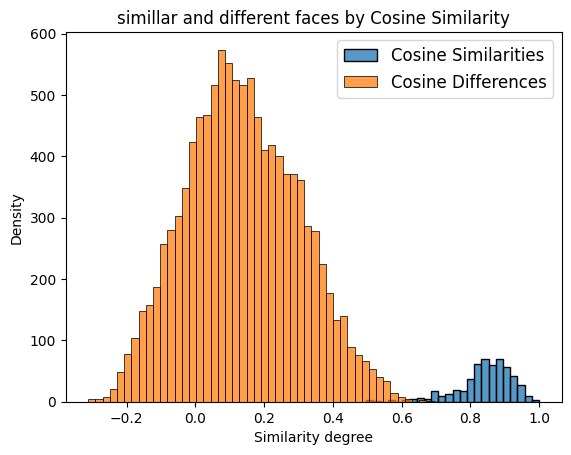

In [54]:
#visualization
import seaborn as sns

sns.histplot(cosine_similarities,  kde=False, label='Cosine Similarities')
sns.histplot(cosine_differences,  kde=False,label='Cosine Differences')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('simillar and different faces by Cosine Similarity')
plt.xlabel('Similarity degree')
plt.ylabel('Density')

In [55]:
cosine_similarities_array = np.array(cosine_similarities)
cosine_differences_array = np.array(cosine_differences)

In [56]:
import random

#create X_train, X_val, Y_train and Y_val for same and different individuals for training in simple mode
cosine_new_dataset_X = np.concatenate((cosine_similarities_array, cosine_differences_array))
cosine_new_dataset_Y = np.concatenate((np.ones(532), np.zeros(10944)))

#shuffle new dataset
#attention: do not split this cell, this shuffelling must run together
random.seed(123)
random.shuffle(cosine_new_dataset_X)
random.seed(123)
random.shuffle(cosine_new_dataset_Y)

cosine_X_train = cosine_new_dataset_X[:10000].reshape(-1, 1)
cosine_X_val = cosine_new_dataset_X[10000:].reshape(-1, 1)

cosine_Y_train = cosine_new_dataset_Y[:10000]
cosine_Y_val = cosine_new_dataset_Y[10000:]

print(f'cosine_X_train : {cosine_X_train.shape}')
print(f'cosine_X_val : {cosine_X_val.shape}')
print(f'cosine_Y_train : {cosine_Y_train.shape}')
print(f'cosine_Y_val : {cosine_Y_val.shape}')

cosine_X_train : (10000, 1)
cosine_X_val : (1476, 1)
cosine_Y_train : (10000,)
cosine_Y_val : (1476,)


In [57]:
# fit model
SVM_model_simple = SVC(kernel='linear', probability=True)
SVM_model_simple.fit(cosine_X_train, cosine_Y_train)

SVC(kernel='linear', probability=True)

In [58]:
# predict
yhat_train_cosine = SVM_model_simple.predict(cosine_X_train)
yhat_val_cosine = SVM_model_simple.predict(cosine_X_val)
# score
score_train_cosine = accuracy_score(cosine_Y_train, yhat_train_cosine)
score_val_cosine = accuracy_score(cosine_Y_val, yhat_val_cosine)
# summarize
print('Accuracy: train=%.3f, validation=%.3f' % (score_train_cosine*100, score_val_cosine*100))

Accuracy: train=99.880, validation=99.729


### Train a SVM model on simple difference of embedings dataset
to detect two face images are same person or not

In [59]:
simple_similarities_array = np.array(simple_similarities)
simple_differences_array = np.array(simple_differences)

In [60]:
simple_similarities_array.shape

(532, 128)

In [61]:
simple_differences_array.shape

(10944, 128)

In [62]:
import random

#create X_train, X_val, Y_train and Y_val for same and different individuals for training in simple mode
new_dataset_X = np.concatenate((simple_similarities_array, simple_differences_array))
new_dataset_Y = np.concatenate((np.ones(532), np.zeros(10944)))

#shuffle dataset
index_list = [i for i in range(11476)]
random.shuffle(index_list)
new_dataset_X_shuffled  = new_dataset_X[index_list, :]
new_dataset_Y_shuffled = new_dataset_Y[index_list,]

simple_X_train = new_dataset_X_shuffled[:10000]
simple_X_val = new_dataset_X_shuffled[10000:]

simple_Y_train = new_dataset_Y_shuffled[:10000]
simple_Y_val = new_dataset_Y_shuffled[10000:]

print(f'X_train : {simple_X_train.shape}')
print(f'X_val : {simple_X_val.shape}')
print(f'Y_train : {simple_Y_train.shape}')
print(f'Y_val : {simple_Y_val.shape}')

X_train : (10000, 128)
X_val : (1476, 128)
Y_train : (10000,)
Y_val : (1476,)


In [63]:
# normalize input embeding vectors
transformer = Normalizer(norm='l2')
simple_X_train_norm = transformer.transform(simple_X_train)
simple_X_val_norm = transformer.transform(simple_X_val)

In [64]:
# fit model
SVM_model_simple = SVC(kernel='linear', probability=True)
SVM_model_simple.fit(simple_X_train_norm, simple_Y_train)

SVC(kernel='linear', probability=True)

In [65]:
# predict
yhat_train_simple = SVM_model_simple.predict(simple_X_train_norm)
yhat_val_simple = SVM_model_simple.predict(simple_X_val_norm)
# score
score_train_simple = accuracy_score(simple_Y_train, yhat_train_simple)
score_val_simple = accuracy_score(simple_Y_val, yhat_val_simple)
# summarize
print('Accuracy: train=%.3f, validation=%.3f' % (score_train_simple*100, score_val_simple*100))

Accuracy: train=95.540, validation=94.715


##### Visualization of norm 2 and actual values after applying simple diffrentiate

Text(0, 0.5, 'Density')

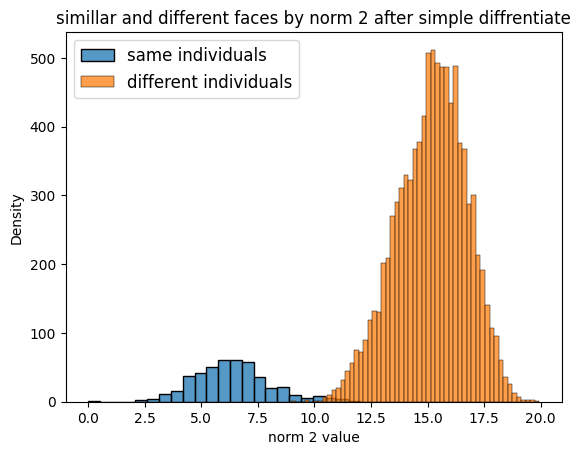

In [66]:
sns.histplot(np.linalg.norm(simple_X_train[np.where(simple_Y_train == 1)[0]], axis=1), kde=False, label='same individuals')
sns.histplot(np.linalg.norm(simple_X_train[np.where(simple_Y_train == 0)[0]], axis=1), kde=False, label='different individuals')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('simillar and different faces by norm 2 after simple diffrentiate')
plt.xlabel('norm 2 value')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

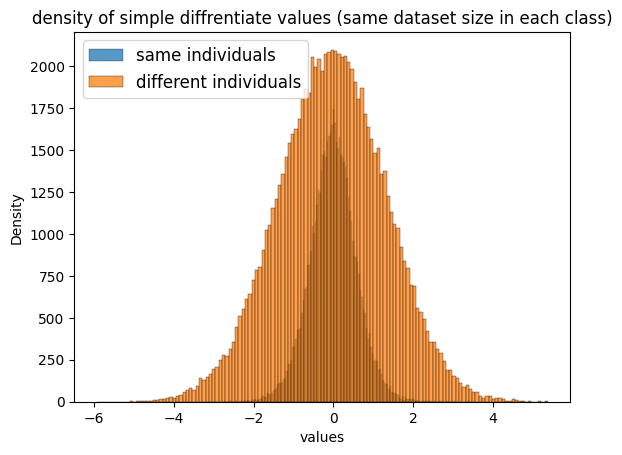

In [67]:
sns.histplot(simple_X_train[np.where(simple_Y_train == 1)[0]].reshape(-1), kde=False, label='same individuals')
sns.histplot(simple_X_train[np.where(simple_Y_train == 0)[0]].reshape(-1)[:85760], kde=False, label='different individuals')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('density of simple diffrentiate values (same dataset size in each class)')
plt.xlabel('values')
plt.ylabel('Density')

## Facial Emotion Recognition with FaceNet

In [34]:
#embedings_split_by_emotions that is previously become norm
print(embedings_split_by_emotions.shape)

(8, 19, 128)


In [35]:
labels_map = {
    0: 'Anger',
    1: 'Contempt',
    2: 'Disgust',
    3: 'Fear',
    4: 'Happy',
    5: 'Neutral',
    6: 'Sad',
    7: 'Surprised',   
}

In [36]:
embedings = embedings_split_by_emotions.reshape(152, 128)

labels = []
for emotion in range(8):
    for _ in range(19):
        labels.append(emotion)

labels = np.array(labels)
print(f'embedings shape : {embedings.shape}')
print(f'labels shape : {labels.shape}')
print('labels :')
print(labels)

embedings shape : (152, 128)
labels shape : (152,)
labels :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7]


In [37]:
#shuffle dataset
import random
index_list = [i for i in range(152)]
random.shuffle(index_list)
embedings_shuffled  = embedings[index_list, :]
labels_shuffled = labels[index_list,]

In [38]:
#train test split
X_train_emb = embedings_shuffled[:120]
X_val_emb = embedings_shuffled[120:]
Y_train = labels_shuffled[:120]
Y_val = labels_shuffled[120:]

print(f'X_train_emb shape : {X_train_emb.shape}')
print(f'X_val_emb shape : {X_val_emb.shape}')
print(f'Y_train shape : {Y_train.shape}')
print(f'Y_val shape : {Y_val.shape}')

X_train_emb shape : (120, 128)
X_val_emb shape : (32, 128)
Y_train shape : (120,)
Y_val shape : (32,)


In [39]:
# normalize input embeding vectors
transformer = Normalizer(norm='l2')
X_train_emb_norm = transformer.transform(X_train_emb)
X_val_emb_norm = transformer.transform(X_val_emb)

In [40]:
# fit model
SVM_model = SVC(kernel='linear', probability=True)
SVM_model.fit(X_train_emb_norm, Y_train)

SVC(kernel='linear', probability=True)

In [41]:
# predict
yhat_train = SVM_model.predict(X_train_emb_norm)
yhat_val = SVM_model.predict(X_val_emb_norm)
# score
score_train = accuracy_score(Y_train, yhat_train)
score_val = accuracy_score(Y_val, yhat_val)
# summarize
print('Accuracy: train=%.3f, validation=%.3f' % (score_train*100, score_val*100))

Accuracy: train=23.333, validation=0.000


### Facial Emotion Change Recognition with FaceNet training on Cosine similarity

#### 1- change in facial emotion across same persons

In [42]:
embedings_split_by_individuals.shape

(19, 8, 128)

In [43]:
cosine_emotion_based_emb = []
simple_emotion_based_emb = []
#emb_1 and emb_2 : difference = (emb_1 - emb_2)

#enter to the itteration of creating emb_1
for cnt_ind, individual in enumerate(embedings_split_by_individuals):
    for cnt_em1, emotion_1 in enumerate(individual):
        emb_1 = emotion_1

        #enter to the itteration of creating emb_2
        #the individual is always same
        for cnt_em2, emotion_2 in enumerate(individual):
            if cnt_em2 == cnt_em1:
                continue
            emb_2 = emotion_2
            cosine_emotion_based_emb.append(cosine_similarity(emb_1, emb_2))
            simple_emotion_based_emb.append(emb_1 - emb_2)

cosine_emotion_based_emb = np.array(cosine_emotion_based_emb)
simple_emotion_based_emb = np.array(simple_emotion_based_emb)

print(f'cosine_emotion_based_emb : {cosine_emotion_based_emb.shape}')
print(f'simple_emotion_based_emb : {simple_emotion_based_emb.shape}')

cosine_emotion_based_emb : (1064,)
simple_emotion_based_emb : (1064, 128)


In [55]:
labels = []
#we have 56 class for each individual this task: Angry-to-Contmpt, Angry-to-Disgust, ...
for _ in range(19):
    for class_ in range(56):
        labels.append(class_)

labels = np.array(labels)
print(f'labels shape : {labels.shape}')
print('labels :')
print(labels)
    

labels shape : (1064,)
labels :
[ 0  1  2 ... 53 54 55]


##### training on cosine_emotion_based_emb

In [59]:
#shuffle dataset
index_list = [i for i in range(1064)]
random.shuffle(index_list)
embedings_shuffled  = cosine_emotion_based_emb[index_list]
labels_shuffled = labels[index_list]

In [60]:
#train test split
X_train_emb = embedings_shuffled[:950].reshape(-1, 1)
X_val_emb = embedings_shuffled[950:].reshape(-1, 1)
Y_train = labels_shuffled[:950]
Y_val = labels_shuffled[950:]

print(f'X_train_emb shape : {X_train_emb.shape}')
print(f'X_val_emb shape : {X_val_emb.shape}')
print(f'Y_train shape : {Y_train.shape}')
print(f'Y_val shape : {Y_val.shape}')
print('-----------------------')

# normalize input embeding vectors
transformer = Normalizer(norm='l2')
X_train_emb_norm = transformer.transform(X_train_emb)
X_val_emb_norm = transformer.transform(X_val_emb)

SVM_model = SVC(kernel='linear', probability=True)
SVM_model.fit(X_train_emb_norm, Y_train)

print('-----------------------')


# predict
yhat_train = SVM_model.predict(X_train_emb_norm)
yhat_val = SVM_model.predict(X_val_emb_norm)
# score
score_train = accuracy_score(Y_train, yhat_train)
score_val = accuracy_score(Y_val, yhat_val)
# summarize
print('Accuracy: train=%.3f, validation=%.3f' % (score_train*100, score_val*100))

X_train_emb shape : (950, 1)
X_val_emb shape : (114, 1)
Y_train shape : (950,)
Y_val shape : (114,)
-----------------------
-----------------------
Accuracy: train=2.000, validation=0.000


#### training on simple_emotion_based_emb

In [64]:
#shuffle dataset
index_list = [i for i in range(1064)]
random.shuffle(index_list)
embedings_shuffled  = simple_emotion_based_emb[index_list]
labels_shuffled = labels[index_list]

In [65]:
#train test split
X_train_emb = embedings_shuffled[:950]
X_val_emb = embedings_shuffled[950:]
Y_train = labels_shuffled[:950]
Y_val = labels_shuffled[950:]

print(f'X_train_emb shape : {X_train_emb.shape}')
print(f'X_val_emb shape : {X_val_emb.shape}')
print(f'Y_train shape : {Y_train.shape}')
print(f'Y_val shape : {Y_val.shape}')
print('-----------------------')

# normalize input embeding vectors
transformer = Normalizer(norm='l2')
X_train_emb_norm = transformer.transform(X_train_emb)
X_val_emb_norm = transformer.transform(X_val_emb)

SVM_model = SVC(kernel='linear', probability=True)
SVM_model.fit(X_train_emb_norm, Y_train)

print('-----------------------')


# predict
yhat_train = SVM_model.predict(X_train_emb_norm)
yhat_val = SVM_model.predict(X_val_emb_norm)
# score
score_train = accuracy_score(Y_train, yhat_train)
score_val = accuracy_score(Y_val, yhat_val)
# summarize
print('Accuracy: train=%.3f, validation=%.3f' % (score_train*100, score_val*100))

X_train_emb shape : (950, 128)
X_val_emb shape : (114, 128)
Y_train shape : (950,)
Y_val shape : (114,)
-----------------------
-----------------------
Accuracy: train=39.158, validation=0.000
